In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
import nltk
from collections import Counter
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

## Carga de datos

In [37]:
df = pd.read_csv('../data/GrammarandProductReviews.csv')

In [38]:
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [39]:
# Drop columns that are not needed
df = df[["brand", "categories", "manufacturer", "name", "reviews.text", "reviews.username", "reviews.rating"]]

In [40]:
# Remove NA values on reviews.text
df.dropna(subset=['reviews.text'], inplace=True)

In [41]:
df.head()

,brand,categories,manufacturer,name,reviews.text,reviews.username,reviews.rating
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,Joshua,5
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,Dorothy W,5
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor.,Dorothy W,5
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,Rebecca,1
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,Walker557,1


In [42]:
# clean the text
def clean_text(text):
    # set text to lowercase
    text = text.lower()

    # remove special characters
    text = re.sub('\[.*?\]', '', text)

    # remove numbers
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # remove new line characters
    text = re.sub('\w*\d\w*', '', text)

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # remove urls
    text = re.sub(r'http\S+', '', text)

    # remove numbers
    text = re.sub(r'\d+', '', text)

    return text

df['cleaned_text'] = df['reviews.text'].apply(lambda x: clean_text(x))

In [43]:
df.head()

,brand,categories,manufacturer,name,reviews.text,reviews.username,reviews.rating,cleaned_text
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,Joshua,5,love album good hip hop side current pop sound...
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,Dorothy W,5,good flavor review collected part promotion
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor.,Dorothy W,5,good flavor
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,Rebecca,1,read reviews looking buying one couples lubric...
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,Walker557,1,husband bought gel us gel caused irritation fe...


## Análisis exploratorio

In [44]:
all_reviews_text = ' '.join(df['cleaned_text'])

word_counts = Counter(all_reviews_text.split())

word_by_product = df.groupby('name')['cleaned_text'].apply(lambda x: ' '.join(x))
most_common_by_product = word_by_product.apply(lambda text: Counter(text.split()).most_common(1))

print("Palabra más repetida por producto:")
print(most_common_by_product)

Palabra más repetida por producto:
name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest          [(well, 3)]
100:Complete First Season (blu-Ray)                                   [(show, 92)]
12110209 - Honeywell Quietset 8-Speed Tower Fan Oscillating           [(fan, 248)]
16ct Peppa Pig Lunch Napkins                                            [(got, 3)]
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black     [(pages, 3)]
                                                                         ...      
Working Girl (dvd)                                                   [(movie, 23)]
Yardley Of London Bath and Shower Gel, Exfoliating Sea Minerals       [(found, 1)]
Yes To Carrots Nourishing Body Wash                                   [(skin, 53)]
Yes To Grapefruit Rejuvenating Body Wash                              [(body, 32)]
bareMinerals Original Foundation Broad Spectrum Spf 15, Medium         [(love, 2)]
Name: cleaned_text, Length: 598, dtype: object


In [45]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

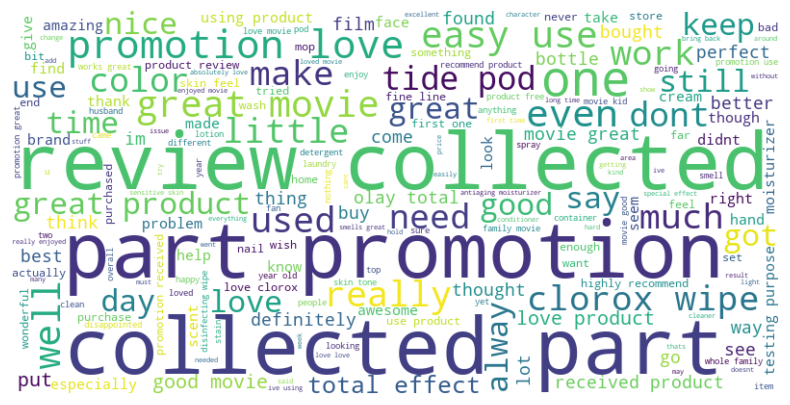

In [46]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

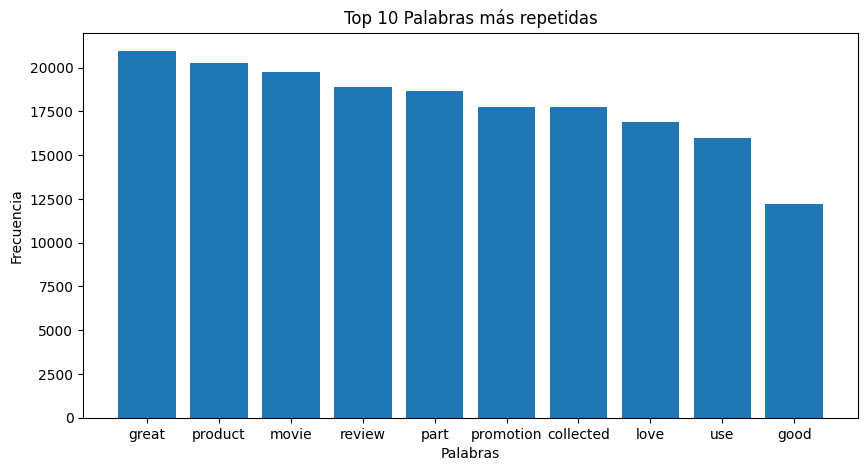

In [47]:
most_common_words = word_counts.most_common(10)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 10 Palabras más repetidas')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

## Analisis de palabras

In [50]:
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\monto\AppData\Roaming\nltk_data...


In [51]:
vader_lexicon = sia.lexicon
def count_vader_sentiment_words(text, lexicon):
    words = text.split()
    positive_count = sum(1 for word in words if word in lexicon and lexicon[word] > 0)
    negative_count = sum(1 for word in words if word in lexicon and lexicon[word] < 0)
    return positive_count, negative_count

# Count positive and negative words
df['positive_count'], df['negative_count'] = zip(*df['cleaned_text'].apply(lambda x: count_vader_sentiment_words(x, vader_lexicon)))

In [55]:
def determine_sentiment(pos_count, neg_count):
    if pos_count > neg_count:
        return 'Positive'
    elif neg_count > pos_count:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df.apply(lambda row: determine_sentiment(row['positive_count'], row['negative_count']), axis=1)

In [56]:
df.head()

,brand,categories,manufacturer,name,reviews.text,reviews.username,reviews.rating,cleaned_text,positive_count,negative_count,sentiment
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,Joshua,5,love album good hip hop side current pop sound...,2,1,Positive
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,Dorothy W,5,good flavor review collected part promotion,1,0,Positive
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor.,Dorothy W,5,good flavor,1,0,Positive
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,Rebecca,1,read reviews looking buying one couples lubric...,2,5,Negative
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,Walker557,1,husband bought gel us gel caused irritation fe...,2,1,Positive
